#### Отчет по теме: "Изучение работы нейронных сетей на основе MNIST со своим приером"

##### Вывод своих картинок из массива "X_real"

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np
import glob
import random
from PIL import Image


filelist = glob.glob('NumL/*.bmp')

x_real = np.array([]).astype(np.ndarray)
y_real = np.array([]).astype(np.ndarray)

##
x_real = np.array([np.asarray(Image.open(fname)) for fname in filelist])

y_real = np.array([1,0,2,8,9,3,7,6,4,5])

(x_train,y_train),(x_test,y_test)=mnist.load_data()



##### Обучение нейросети на тренировочных данных из MNIST и собственныз тетсовых данных.

In [2]:
x_real=x_real.reshape(x_real.shape[0],x_real.shape[1]*x_real.shape[2])
x_real=x_real.astype('float32')
x_real/=255
y_real = np_utils.to_categorical(y_real, 10)

x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_test=x_test.astype('float32')
x_test/=255
y_test = np_utils.to_categorical(y_test, 10)


model=models.Sequential()

model.add(layers.Dense(10,input_shape=(784,),activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_real, y_real,batch_size=128, epochs=30,validation_data=(x_test, y_test))

Train on 10 samples, validate on 10000 samples
Epoch 1/30
10/10 [==============================] - 1s 72ms/sample - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3564 - val_accuracy: 0.1077
Epoch 2/30
10/10 [==============================] - 0s 14ms/sample - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3577 - val_accuracy: 0.1022
Epoch 3/30
10/10 [==============================] - 0s 15ms/sample - loss: 2.3024 - accuracy: 0.1000 - val_loss: 2.3595 - val_accuracy: 0.0974
Epoch 4/30
10/10 [==============================] - 0s 18ms/sample - loss: 2.3021 - accuracy: 0.1000 - val_loss: 2.3621 - val_accuracy: 0.0936
Epoch 5/30
10/10 [==============================] - 0s 17ms/sample - loss: 2.3019 - accuracy: 0.2000 - val_loss: 2.3657 - val_accuracy: 0.0900
Epoch 6/30
10/10 [==============================] - 0s 15ms/sample - loss: 2.3017 - accuracy: 0.1000 - val_loss: 2.3703 - val_accuracy: 0.0874
Epoch 7/30
10/10 [==============================] - 0s 15ms/sample - loss: 2.3015 - accuracy: 0

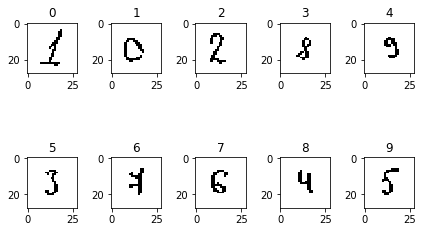

In [5]:
fig = plt.figure()

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_real[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)

plt.tight_layout()
plt.show()

In [6]:
for i in range(10):
    x1 = x_real[i].reshape(1,28*28)
    y1 = model.predict(x1)
    yo = model.predict_classes(x1)
    print(yo)

[1]
[0]
[2]
[8]
[8]
[8]
[7]
[6]
[7]
[8]


##### Полученные графики точности и потерь.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


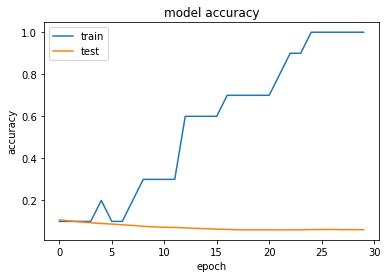

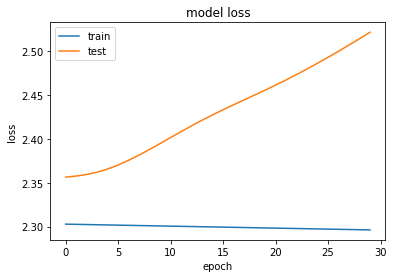

In [7]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
print(history.history)

{'loss': [2.3028383255004883, 2.3026070594787598, 2.3023769855499268, 2.3021492958068848, 2.3019232749938965, 2.301698684692383, 2.30147385597229, 2.301248788833618, 2.30102276802063, 2.3007960319519043, 2.3005688190460205, 2.3003416061401367, 2.300114393234253, 2.2998876571655273, 2.2996609210968018, 2.2994346618652344, 2.299208164215088, 2.298981189727783, 2.2987544536590576, 2.298527956008911, 2.2983009815216064, 2.2980740070343018, 2.297847270965576, 2.2976202964782715, 2.297393798828125, 2.297166585922241, 2.2969393730163574, 2.296712875366211, 2.2964859008789062, 2.2962589263916016], 'accuracy': [0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [2.3564498710632322, 2.357694242477417, 2.35946849899292, 2.362100086212158, 2.3657302532196045, 2.3703126525878906, 2.375689256286621, 2.3816750122070314, 2.3880945301055907, 2.394786946105957, 2.4015996936798096, 2.4083860771

In [9]:
print(history.params)

{'batch_size': 128, 'epochs': 30, 'steps': 1, 'samples': 10, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}


##### Использование сети "Долгой краткосрочной памяти для обучения функции Sin".

X.shape = (3122, 20, 1)
y.shape = (3122,)
Train on 3122 samples
Epoch 1/20
3122/3122 [==============================] - 3s 911us/sample - loss: 0.3915
Epoch 2/20
3122/3122 [==============================] - 1s 429us/sample - loss: 0.0894
Epoch 3/20
3122/3122 [==============================] - 2s 509us/sample - loss: 0.0129
Epoch 4/20
3122/3122 [==============================] - 2s 543us/sample - loss: 0.0066
Epoch 5/20
3122/3122 [==============================] - 2s 544us/sample - loss: 0.0039
Epoch 6/20
3122/3122 [==============================] - 2s 506us/sample - loss: 0.0025
Epoch 7/20
3122/3122 [==============================] - 2s 560us/sample - loss: 0.0016
Epoch 8/20
3122/3122 [==============================] - 2s 577us/sample - loss: 0.0011
Epoch 9/20
3122/3122 [==============================] - 2s 551us/sample - loss: 7.0081e-04
Epoch 10/20
3122/3122 [==============================] - 2s 572us/sample - loss: 4.7608e-04
Epoch 11/20
3122/3122 [==============================] - 

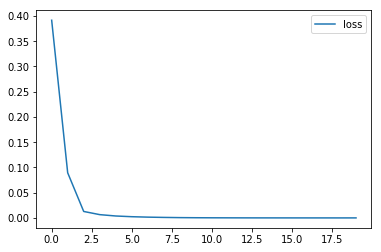

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np



model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')


def train_function(x):
    return np.sin(x)
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)
# Задаём нужную последовательность
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# Изменяем размерность из [samples, timesteps] в [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))


X.shape = (3122, 20, 1)
y.shape = (3122,)

history = model.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

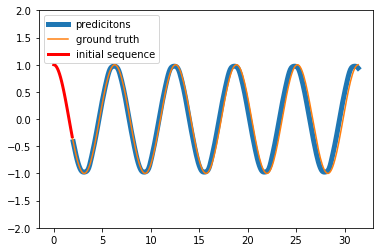

In [11]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="predicitons",linewidth=5)
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red",linewidth=3)
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

# Литература

* [Habrahabr](https://habr.com/ru/company/wunderfund/blog/331310/)